<a href="https://colab.research.google.com/github/Daki-15/Sales-Analysis/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis
## Import necessary libraries

In [143]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Merge data from each month into one CSV

In [ ]:
FILE_PATHS = ""
FILE_PATH_CSV = ""

In [144]:
files = [file for file in os.listdir(FILE_PATHS)]

all_data = pd.DataFrame()

for file in files:
  df = pd.read_csv(FILE_PATHS+"/"+file)
  all_data = pd.concat([all_data, df], axis=0)

all_data.to_csv(FILE_PATH_CSV, index=False)

## Read new data frame

In [145]:
data = pd.read_csv(FILE_PATH_CSV)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the data

In [146]:
data.isna().sum()

Order ID            2180
Product             2180
Quantity Ordered    2180
Price Each          2180
Order Date          2180
Purchase Address    2180
dtype: int64

### Drop rows of NaN

In [147]:
# dropna(how=['any', 'all'],...)

data.dropna(how='all', inplace=True)

### Find 'Or' and delete it

In [148]:
data = data[data['Order Date'].str[:2] != 'Or'] # Let's just set the variable to remember the lines without "Or".

## Augment data with additional columns

### Add Month Column

In [149]:
data['Month'] = data['Order Date'].str[0:2].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743800 entries, 0 to 747399
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          743800 non-null  object
 1   Product           743800 non-null  object
 2   Quantity Ordered  743800 non-null  object
 3   Price Each        743800 non-null  object
 4   Order Date        743800 non-null  object
 5   Purchase Address  743800 non-null  object
 6   Month             743800 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 45.4+ MB


### Add a Sales Column

In [150]:
# Convert columns to correct type

data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [151]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a City Column

In [152]:
# Let's use .apply()
data["City"] = data['Purchase Address'].apply(lambda x: x.split(',')[1])

# By defining our function
def get_city(purchase_addres):
  return purchase_addres.split(',')[1]

def get_state(purchase_addres):
  return purchase_addres.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [153]:
### Converting a 'Order Date' column to a datetime data type

data['Order Date'] = pd.to_datetime(data['Order Date'])

In [154]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute

In [155]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


### Question 1: What is the best month for sales? How much was earned that month?

In [156]:
Q1_res = data.groupby('Month').sum()

Q1_res

<ipython-input-156-a9a3f2e4b9d1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Q1_res = data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,43612,7247073.52,7289026.92,557940,1129760
2,53796,8755538.88,8808089.68,690676,1419540
3,68020,11164831.32,11228401.52,875876,1790236
4,82232,13470684.08,13562680.96,1049036,2176744
5,74668,12540500.52,12610427.00,955120,1951596
6,61012,10248102.44,10311209.04,782112,1609744
7,64288,10530158.24,10591103.04,824676,1669396
8,53792,8921381.68,8977871.52,689156,1415428
9,52436,8339968.36,8390240.52,674052,1366792


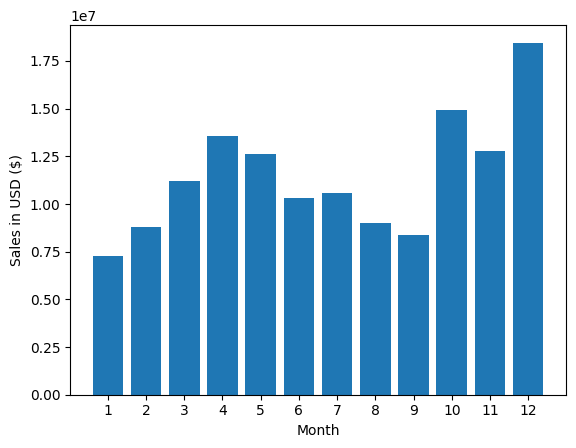

In [157]:
months = range(1,13)

plt.bar(months, Q1_res['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')

plt.show()

### Question 2 : What city had the highest number of sales

In [158]:
Q2_res = data.groupby('City').sum()

Q2_res

<ipython-input-158-4c7d0b68980c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Q2_res = data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),66408,11119632.80,419176,11181994.32,857056,1771728
Austin (TX),44612,7239494.44,279316,7278327.00,567784,1156240
Boston (MA),90112,14549639.08,564448,14646568.04,1152900,2361768
Dallas (TX),66920,11010511.28,418480,11071901.60,857560,1740620
Los Angeles (CA),133156,21685740.92,833300,21810283.20,1709776,3466552
New York City (NY),111728,18541483.32,702964,18657269.72,1430784,2934392
Portland (ME),11000,1788757.00,68576,1799033.08,140844,291424
Portland (OR),45212,7442232.88,282484,7482929.36,577684,1182132
San Francisco (CA),200956,32845846.96,1262080,33048815.64,2573060,5277908


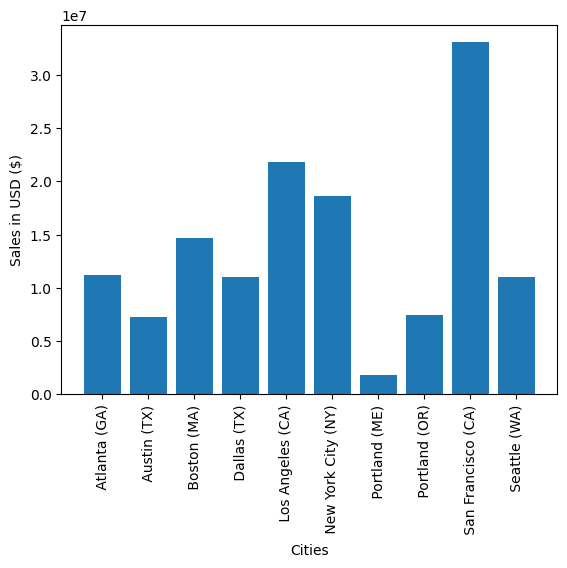

In [159]:
cities = [city for city, df in data.groupby('City')]

plt.bar(cities, Q2_res['Sales'])
plt.xticks(cities, rotation='vertical')
plt.xlabel("Cities")
plt.ylabel('Sales in USD ($)')

plt.show()

### Question 3:  What time should we display advertisements to maximize likelihood of customer's buying product?

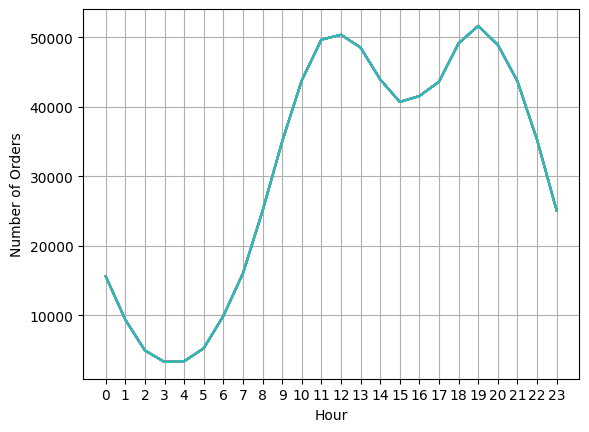

In [160]:
plt.grid()
hours = [hour for hour, df in data.groupby('Hour')]

plt.plot(hours, data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.show()

# My recommendation is slightly before 11am or 7pm

### Question 4: What product sold the most?

In [161]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Minute'],
      dtype='object')

<ipython-input-166-ec9fe667c61b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_order = product_group.sum()['Quantity Ordered']


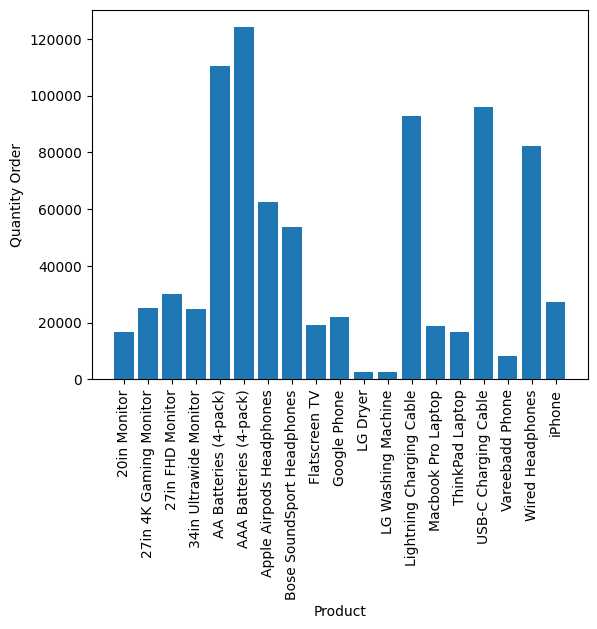

In [166]:
product_group = data.groupby('Product')
quantity_order = product_group.sum()['Quantity Ordered']

products = [prod for prod, df in product_group]

plt.bar(products, quantity_order)
plt.xticks(products, rotation='vertical')
plt.xlabel("Product")
plt.ylabel("Quantity Order")


plt.show()

<ipython-input-175-54fa979323ac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = data.groupby('Product').mean()['Price Each']
<ipython-input-175-54fa979323ac>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(products, rotation="vertical")


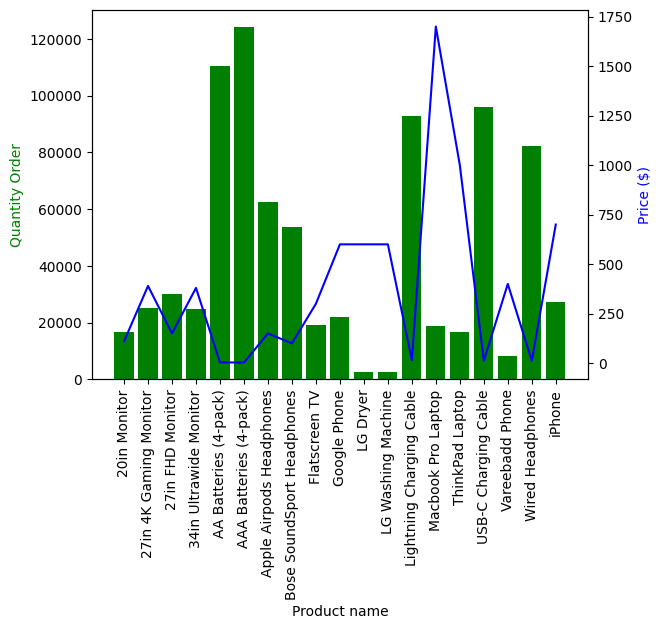

In [175]:
prices = data.groupby('Product').mean()['Price Each']

fig, ax = plt.subplots()

ax2 = ax.twinx()
ax.bar(products, quantity_order, color="g")
ax2.plot(products, prices, color="b")

ax.set_xticklabels(products, rotation="vertical")
ax.set_xlabel("Product name")
ax.set_ylabel("Quantity Order", color="g")

ax2.set_ylabel("Price ($)", color="b")


fig.show()